In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Iterable, List, Tuple

from sklearn.model_selection import train_test_split

In [ ]:
# `load_boston` has been removed from scikit-learn since version 1.2.

#from sklearn.datasets import load_boston
#boston = load_boston()

In [2]:
!wget -i https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
data_git = pd.read_csv('boston_house_prices.csv', sep="\s+")

--2023-10-28 20:40:13--  https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62753 (61K) [text/plain]
Saving to: 'boston_house_prices.csv.4'

boston_house_prices 100%[===================>]  61.28K  --.-KB/s    in 0.09s   

2023-10-28 20:40:13 (708 KB/s) - 'boston_house_prices.csv.4' saved [62753/62753]

The destination name is too long (53944), reducing to 236
--2023-10-28 20:40:13--  https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/%7B%22payload%22:%7B%22allShortcutsEnabled%22:false,%22fileTree%22:%7B%22sklearn/datasets/data%22:%7B%22items%22:[%7B%22name%22:%22__init__.py%22,%22path%22:%22sklearn/datasets/data/__init__.py%22,%22contentType%22:%22file%22%7D,%7B%22name%22:%22boston_house_prices.csv%22,%22path%22:%22sklearn/datasets/data/bo

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.



In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = pd.DataFrame(data, columns=feature_names, index=range(len(data)))
y = pd.DataFrame(target, columns=['MEDV'], index=range(len(target)))

X['target'] = y

In [5]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)

Функции разбиения вершины, критерия информативности, подсчета критерии ошибки

In [6]:
def H(R: np.array) -> float:
    """
    Compute impurity criterion for a fixed set of objects R.
    Last column is assumed to contain target value
    """
    
    #I've chosen Gini Index as an impurity criterion
    
    
    classes = pd.unique(R.iloc[:,-1]) # Values that target can have = classes
    target = R.iloc[:,-1]
    gini_sum = 0
    
    for k in classes:
        p_k = len(target[target == k])/len(target)
        gini_sum += p_k*(1-p_k)
    
    gini_impurity = 1 - gini_sum
    
    return gini_impurity


def split_node(R_m: np.array, feature: str, t: float) -> Iterable[np.array]:
    """
    Split a fixed set of objects R_m given feature number and threshold t
    """
    
    left_node = R_m[R_m[feature].le(t)]
    right_node = R_m[R_m[feature].gt(t)]
    
    
    return left_node, right_node
    


def q_error(R_m: np.array, feature: str, t: float) -> float:
    """
    Compute error criterion for given split parameters
    """
    
    weight_left = len(split_node(R_m, feature, t)[0])/len(R_m)
    weight_right = len(split_node(R_m, feature, t)[1])/len(R_m)
    
    impurity_criterion_left = H(split_node(R_m, feature, t)[0])
    impurity_criterion_right = H(split_node(R_m, feature, t)[1])
    
    error = weight_left*impurity_criterion_left + weight_right*impurity_criterion_right
    
    return error
    


Перебираем все возможные разбиения обучающей выборки по одному из признаков и строим график критерия ошибки в зависимости от значения порога

27.74
0.46


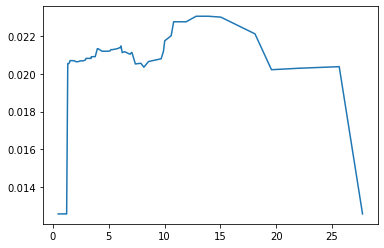

In [9]:

# Let's pick feature 3 (INDUS)
# because the scale of the feature is convenient for the plotting of the graphics

# Treshold range is roughly [0,28]:

print(np.max(X_train["INDUS"]))
print(np.min(X_train["INDUS"]))


# Treshold-Error interdependency:

Q_error_score = []

possible_tresholds = np.array(pd.unique(X_train['INDUS']))

possible_tresholds = sorted(possible_tresholds)

for t in possible_tresholds:
    
    Q_error_score.append(q_error(X_test, 'INDUS', t))
    
plt.plot(possible_tresholds, Q_error_score, label='Q Error Score')


Функция, находящая оптимальное разбиение данной вершины по данному признаку

In [24]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, List[float]]:
    
    possible_tresholds = np.array(pd.unique(X[feature]))
    possible_tresholds = sorted(possible_tresholds)
    
    min_q_error = float("inf")
    best_treshold = 0
    
    for t in possible_tresholds:
        
        left_child, right_child = split_node(R_m, feature, t)
        
        if len(left_child) > 0 and len(right_child) > 0: # A condition so the splitting exists
            
            q_error_score = q_error(R_m, feature, t)
            
            if q_error_score < min_q_error:
                
                best_treshold = t
    
    error_score_list = []
    
    for t in possible_tresholds:
        
        error_score_list.append(q_error(R_m, feature, t))
            
    return best_treshold, error_score_list
        
        

Для первого разбиения найдите признак, показывающий наилучшее качество. Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога.

In [25]:
best_treshold_list = []
q_error_list = []

for feature in X.columns[:-1]: # so the target is not included
    
    t = get_optimal_split(X_train, feature)[0]
    best_treshold_list.append(t)
    q_error_list.append(q_error(X_test, feature, t))
    
    
best_feature_number = q_error_list.index(np.min(q_error_list))
best_feature = X.columns[best_feature_number]

print("Best feature is: "+X.columns[best_feature_number])
print("Best treshold value is: "+str(best_treshold_list[best_feature_number]))
print("Minimal Q Error Value: "+str(q_error_list[best_feature_number]))


Best feature is: CRIM
Best treshold value is: 73.5341
Minimal Q Error Value: 0.012586025172051873


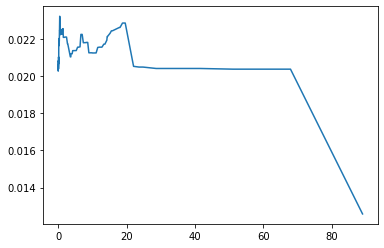

In [26]:
possible_tresholds_BF = np.array(pd.unique(X_train[best_feature])) # BF stands for best feature

possible_tresholds_BF = sorted(possible_tresholds_BF)
Q_error_score_BF = []

for t in possible_tresholds_BF:
    Q_error_score_BF.append(q_error(X_test, best_feature, t))
    
plt.plot(possible_tresholds_BF, Q_error_score_BF, label='Q Error Score')

# Pay attention to the scale of the graphic, please

 **Задание 5 (2 балла)**: Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения входного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения.

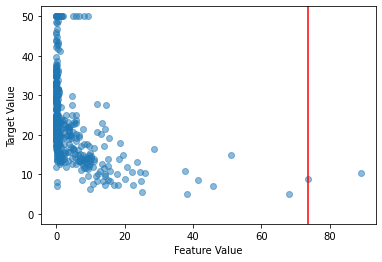

In [27]:
fig, ax = plt.subplots()
ax.scatter(X[best_feature], X.iloc[:,-1], alpha=0.5)

ax.vlines(best_treshold_list[best_feature_number], 0, 50, transform=ax.get_xaxis_transform(), colors='r')

ax.set_xlabel('Feature Value')
ax.set_ylabel('Target Value')

plt.show()

In [23]:
best_treshold_list[best_feature_number]

73.5341